# Movie Revenue Prediction using Linear Regression

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Dataset:

In [2]:
df = pd.read_csv('tmdb_5000_movies.csv')
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


# Defining the Independent and Dependent Variables:

In [4]:
# Define Independent (X)
x = df[['budget', 'popularity', 'runtime', 'vote_average', 'vote_count']]
x.head()

,budget,popularity,runtime,vote_average,vote_count
0,237000000,150.437577,162.0,7.2,11800
1,300000000,139.082615,169.0,6.9,4500
2,245000000,107.376788,148.0,6.3,4466
3,250000000,112.312950,165.0,7.6,9106
4,260000000,43.926995,132.0,6.1,2124


In [5]:
# Define Dependent (Y) Variables
y = df['revenue']
y.head()

0    2787965087
1     961000000
2     880674609
3    1084939099
4     284139100
Name: revenue, dtype: int64

# Adding a Constant (Intercept):

In [6]:
# Add a constant (intercept) to the independent variables
x = sm.add_constant(x)

# Fit the Linear Regression Model using `statsmodels`:

In [7]:
model = sm.OLS.from_formula('y ~  x', df)
results = model.fit()
print(results.params)

Intercept   -2.303939e+06
x[0]        -2.303939e+06
x[1]         1.631833e+00
x[2]         2.481282e+05
x[3]        -2.441379e+04
x[4]        -1.532683e+06
x[5]         6.676961e+04
dtype: float64


#### Interpretation: 
#### Intercept: -2.3039 indicates the expected value of `(y) dependent variable` when `(x) independent variable` is zero.
#### `Negative` coefficients suggest an inverse relationship, where increasing the independent variable decreases the predicted `revenue`.
#### `Positive` coefficients indicate a direct relationship, where increasing the value of the independent variable increases the predicted `revenue`.
#### `66,769` coefficients: This suggests that the sixth independent variable is positively associated with revenue. For each unit increase in this variable, movie revenue is predicted to increase by 66,769 units.

# Making Predictions Based on the Existing Dataset:

In [16]:
predictions = results.predict(x)
df['Predicted_Revenue'] = predictions
print(df[['revenue', 'Predicted_Revenue']].head())

      revenue  Predicted_Revenue
0  2787965087       1.192355e+09
1   961000000       8.052143e+08
2   880674609       7.067584e+08
3  1084939099       1.023546e+09
4   284139100       5.598150e+08


#### Model Performance: The discrepancies between the actual and predicted values suggest that while the model is capturing the general trend, it may need further tuning or more feature variables to improve accuracy, especially in cases where there are large differences between the predicted and actual values.

#### The model provides a reasonable approximation for most cases, but there are instances of both overestimation and underestimation. This could be further improved by using more features, adjusting the model, or using a more complex algorithm.

# Evaluating the Model Performance:

In [21]:
# R-squared Value: Shows the proportion of variance explained by the model.
r_squared = results.rsquared
print(f"R-squared: {r_squared}")

R-squared: 0.7219237962194547


#### Interpretation: 
#### Model Performance: The statement indicates that the regression model is generally effective in capturing the overall trend in the data and making reasonable predictions for revenue.

# Visualizing the Prediction:

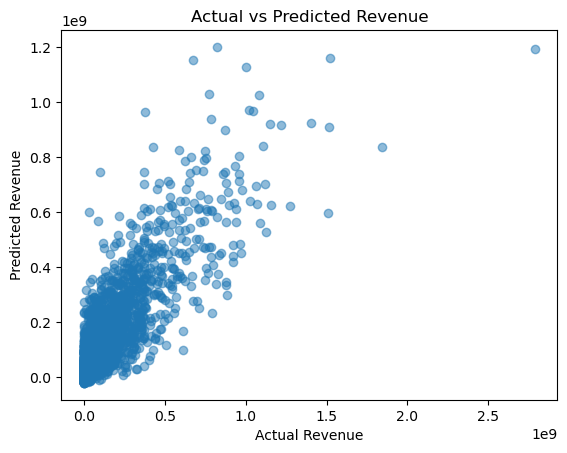

In [19]:
plt.scatter(df['revenue'], df['Predicted_Revenue'], alpha=0.5)
plt.title('Actual vs Predicted Revenue')
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.show()

#### Conclusion:
#### Clustering at Lower Values: Most of the data points are clustered in the lower range of both actual and predicted revenues. This indicates that the model is generally predicting lower values for revenue, which aligns with the actual data. However, it may also suggest that the dataset contains a large number of lower-revenue movies, skewing the model toward lower values.

#### Over/Underestimation at Higher Revenues: As the actual revenue increases (especially beyond 1 billion on the x-axis), the predicted values do not closely align with the actual ones. Some points show significant deviations, which may indicate that the model struggles to accurately predict revenue for higher-grossing movies.

#### Outliers: There are visible outliers, where the model either significantly underpredicts or overpredicts the revenue. For example, in some cases, movies with actual revenues around 1 billion or higher are predicted to have much lower revenues.

#### The model appears to do reasonably well for movies with lower revenue but struggles with higher-revenue movies. This could be due to limited data points at the higher end or limitations in the features used for prediction. Further tuning or feature engineering may be needed to improve its performance across all revenue ranges.